#  IDEA LAB 8th Weekly Seminar Conference Code File
## Sigmoid
### Writer: Su-Yeon Kang 
2022.08.22

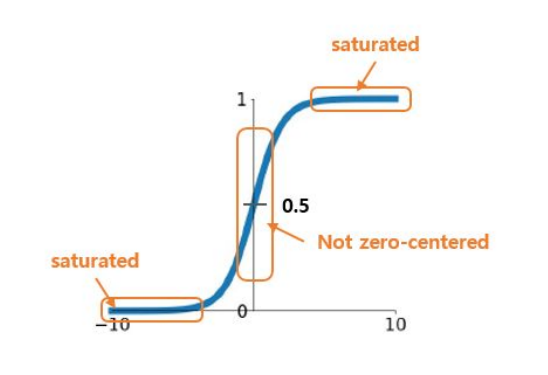

## sigmoid Fuction

- 시그모이드 함수는 0에서 1 사이의 함수이며, 값이 들어왔을 때, 0~1 사이의 값을 반환한다.
- 연속형 데이터이기 때문에 계단 함수가 끊기지 않는 매끄러운 모양으로 바뀐 것을 알 수 있다.
 - 동시에 이상치가 들어온다 할지라도, 시그모이드 함수는 0과 1에 수렴하므로, 이상치 문제도 해결하면서, 연속된 값을 전달할 수 있다.
 
 
- 시그모이드 함수를 활성화 함수로 사용하면, 0과 1에 가까운 값을 통해 이진 분류를 할 수 있다.


## 시그모이드 함수의 장점과 단점
### 장점
출력 값의 범위가 0 ~ 1 사이이며, 매우 매끄러운 곡선을 가지므로, 후술 할 경사하강법을 시행할 때, 기울기가 급격하게 변해서 발산하는, <b>기울기 폭주(Gradient Exploding)가 발생하지 않는다.</b>

분류는 0과 1로 나뉘며, 출력 값이 어느 값에 가까운지를 통해 어느 분류에 속하는지 쉽게 알 수 있다.
 

### 단점
입력값이 아무리 크더라도, 출력되는 값의 범위가 매우 좁기 때문에 경사하강법 수행 시에 범위가 너무 좁아, 0에 수렴하는 기울기 소실(Gradient Vanishing)이 발생할 수 있다.

<b>- 기울기 소실(Gradient Vanishing) 문제</b>


시그모이드 함수는 아무리 큰 값이 들어온다 할지라도 0~1사이의 값만 반환하므로, 값이 일정 비율로 줄어들어 값의 왜곡이라 할 수는 없으나, 값이 현저하게 줄어들게 된다. 
또한, 출력 값의 중앙값이 0이 아닌 0.5이며, 모두 양수기 때문에 출력의 가중치 합이 입력의 가중치 합보다 커지게 된다.


이를 편향 이동(Bias Gradient)라 하고, 신호가 각 레이어를 통과할 때마다 분산이 계속 커지게 되어, 활성화 함수의 출력이 최댓값과 최솟값인 0과 1에 수렴하게 된다.


시그모이드 함수의 도함수는 $\sigma(1-\sigma)$인데, 도함수에 들어가는 함수의 값이 0이나 1에 가까울수록 당연히 출력되는 값이 0에 가까워지게 된다.


이로 인해 수렴되는 뉴련의 기울기(Gradient) 값이 0이 되고, 역전파 시 0이 곱해져서 기울기가 소멸(kill)되는 현상이 발생해버린다! 즉, 역전파가 진행될수록 아래 층(Layer)에 아무런 신호가 전달되지 않는 것이다!


이를 <b>기울기 소실(Gradient Vanishing)</b>이라 하며, 렐루 함수가 등장하기 전까지인 1986년부터 2006년까지 해결되지 않은 문제다.

<b>- 학습 속도 저하 문제</b>

시그모이드 함수의 출력값은 모두 양수기 때문에 경사하강법을 진행할 때, 그 기울기가 모두 양수거나 음수가 된다. 이는 기울기 업데이트가 지그재그로 변동하는 결과를 가지고 오고, 학습 효율성을 감소시켜 학습에 더 많은 시간이 들어가게 만든다.
 

 

 

 위 시그모이드 함수의 장단점을 간추려보면, 출력값이 너무 작아 제대로 학습이 안되는데다가 시간도 많이 잡아먹는다는 소리다.

 이는, 출력층에서 시그모이드 함수를 사용하는 것은 상관 없으나, 아래로 정보가 계속 흘러가는 은닉층(Hidden Layer)에서는 시그모이드 함수를 활성화 함수로 사용해서는 안된다는 소리다.

은닉층(Hidden Layer)은 입력층(시작), 출력층(끝) 사이에 있는 부분이다.
즉, 은닉층에는 앞서 말했던 선형 함수와 시그모이드 함수는 사용하지 않는 것이 좋다.
<b>시그모이드 함수는 이진 분류를 하고자 하는 경우 출력층에서만 사용하는 것을 권고한다.</b>


만약, 입력층에서 시그모이드 함수를 쓰고자 한다면, 이의 발전형인 <b>하이퍼볼릭 탄젠트 함수</b>를 사용하는 것을 추천한다.
 
출처: https://gooopy.tistory.com/52?category=824281

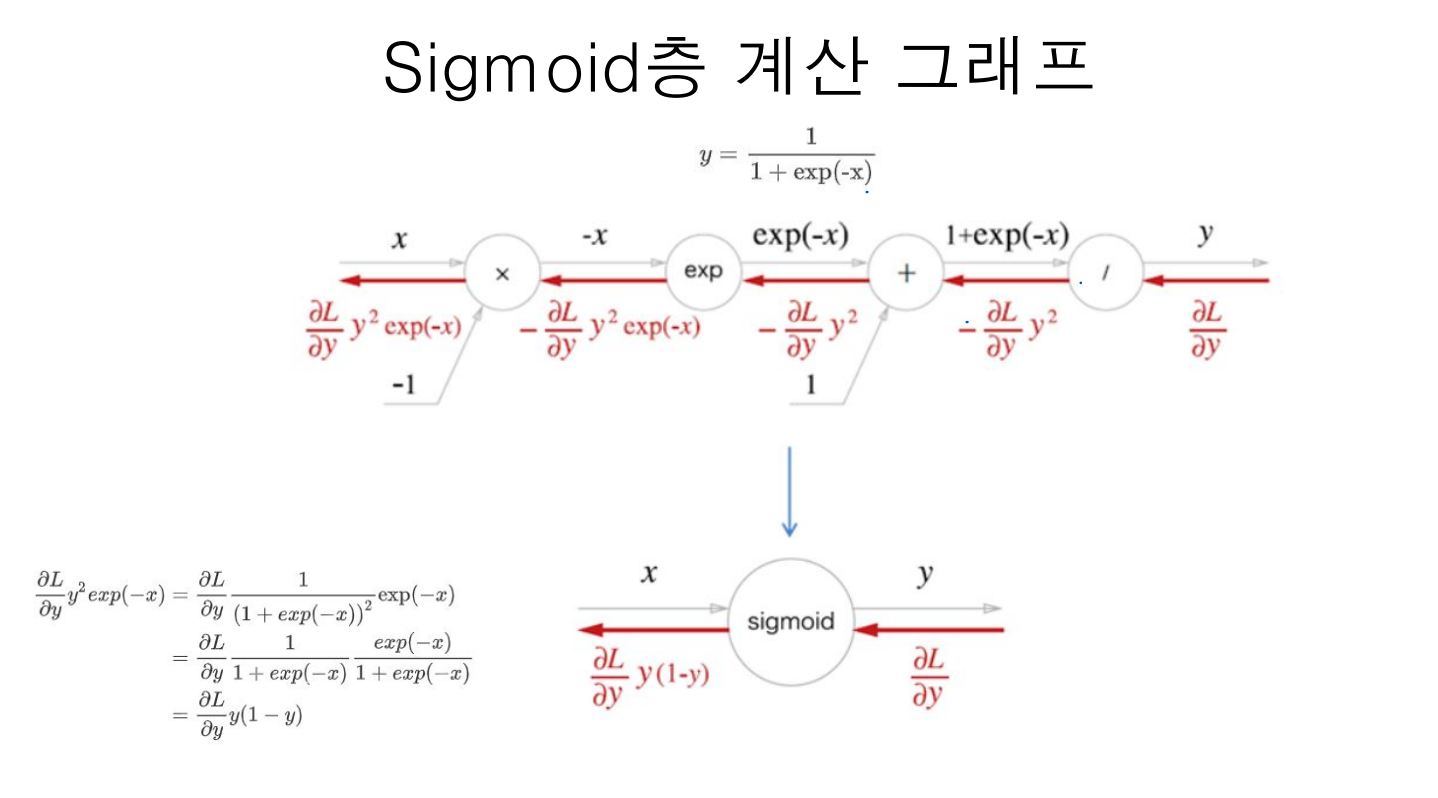

In [28]:
import numpy as np

In [34]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [35]:
# 시그모이드 함수의 미분
def diff_sigmoid(x):
    
    return 1/(1+np.exp(-x)) * (1 - (1/(1+np.exp(-x))))

In [36]:
class Sigmoid:
    def __init__(self):
        self.out = None

    def forward(self, x):
        out = sigmoid(x) 
        self.out = out # 순전파의 출력을 인스턴스 변수 out에 보관
        return out

    def backward(self, dout): # 미분해서 나온 값을 넣어줍니다.
        dx = dout * (1.0 - self.out) * self.out # 역전파 계산 때 저장한 out값을 사용

        return dx

In [37]:
sig = Sigmoid()

In [38]:
sig.forward(np.array([1,-2,3,-4]))

array([0.73105858, 0.11920292, 0.95257413, 0.01798621])